## **TUMOUR SEGMENTATION in Brain MRI Images with Transfer learning**
-Pranaydeep Mayank(19bai1026)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
tumour_images=[]
for name in glob.glob('/content/drive/MyDrive/brain MRI/yes/*.jpg'): 
    image = cv2.imread(name)
    image = cv2.resize(image,(240,240))
    tumour_images.append(image)

## **The Dataset**

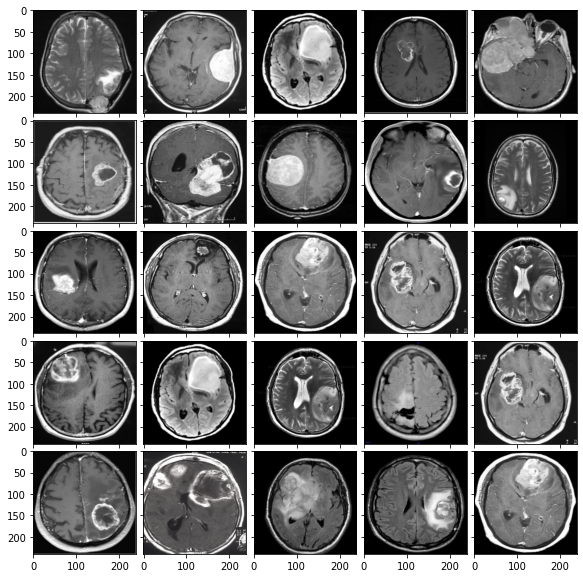

In [ ]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:25]):
    #print(ax)
    #print(im.shape)
    ax.imshow(im)
plt.show()

## **Feature Extraction using different Edge detecting Filters**

1.)Prewitt Filter
2.)Canny Filter

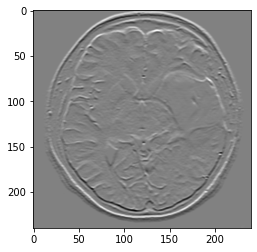

In [ ]:
for image in tumour_images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pre_hor = filters.prewitt_h(gray_image)
    pre_ver = filters.prewitt_v(gray_image)

    # Sobel Kernel
   # ed_sobel = filters.sobel(grayimage)

    #canny algorithm
    #can = feature.canny(gray_image)
    plt.imshow(pre_hor, cmap='gray');
      # prewitt kernel
    
    gabor_images.append(can)

  
  #img = image.convert('L')
  #print(gray_image.shape)

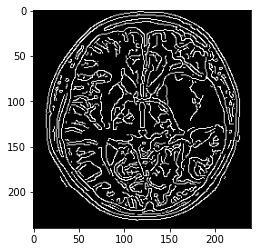

In [ ]:
from PIL import Image
from skimage import filters
gabor_images=[]
for image in tumour_images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pre_hor = filters.prewitt_h(gray_image)
    pre_ver = filters.prewitt_v(gray_image)

    # Sobel Kernel
   # ed_sobel = filters.sobel(grayimage)

    #canny algorithm
    can = feature.canny(gray_image)
    plt.imshow(can, cmap='gray');
      # prewitt kernel
    
    gabor_images.append(can)

  
  #img = image.convert('L')
  #print(gray_image.shape)


In [ ]:
len(tumour_images)

86

## **Using Transfer Learning Models for classification:**


VGG16 Model






ResNet50 Model


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224, 3]
batch_size = 64
train_path = '/content/drive/MyDrive/brain MRI'
folders = glob(train_path+'/*')
print(folders)
noclasses = len(folders)
print(noclasses)

['/content/drive/MyDrive/brain MRI/yes', '/content/drive/MyDrive/brain MRI/no']
2


In [ ]:
for path in folders:
    files = glob(path+'/*')
    print(path, len(files))

/content/drive/MyDrive/brain MRI/yes 155
/content/drive/MyDrive/brain MRI/no 98


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [ ]:
for i, layer in enumerate(vgg.layers):
    if i<15:
        layer.trainable = False
    
    print(i, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fe52a917090> False
1 <keras.layers.convolutional.Conv2D object at 0x7fe52a9463d0> False
2 <keras.layers.convolutional.Conv2D object at 0x7fe52aa90190> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7fe52a953690> False
4 <keras.layers.convolutional.Conv2D object at 0x7fe52a93d650> False
5 <keras.layers.convolutional.Conv2D object at 0x7fe52a92fcd0> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7fe52aa88410> False
7 <keras.layers.convolutional.Conv2D object at 0x7fe52a897750> False
8 <keras.layers.convolutional.Conv2D object at 0x7fe52b1cc690> False
9 <keras.layers.convolutional.Conv2D object at 0x7fe52aba5790> False
10 <keras.layers.pooling.MaxPooling2D object at 0x7fe52a9382d0> False
11 <keras.layers.convolutional.Conv2D object at 0x7fe52abbe650> False
12 <keras.layers.convolutional.Conv2D object at 0x7fe52ab9b150> False
13 <keras.layers.convolutional.Conv2D object at 0x7fe52b403490> False
14 <keras.layers.pooling.Max

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(noclasses, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (224,224),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (224,224),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation') # set as validation data

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model_history = model.fit(train_generator, 
                          validation_data=test_generator,
                          epochs=25,
                          steps_per_epoch=len(train_generator),
                          validation_steps=len(test_generator),
                          initial_epoch=20)

Epoch 21/25
4/4 [==============================] - 156s 39s/step - loss: 7.1786 - accuracy: 0.5567 - val_loss: 0.6845 - val_accuracy: 0.6800
Epoch 22/25
4/4 [==============================] - 135s 33s/step - loss: 0.8069 - accuracy: 0.6256 - val_loss: 0.6585 - val_accuracy: 0.6600
Epoch 23/25
4/4 [==============================] - 133s 32s/step - loss: 0.7721 - accuracy: 0.5025 - val_loss: 0.6496 - val_accuracy: 0.6200
Epoch 24/25
4/4 [==============================] - 134s 33s/step - loss: 0.6491 - accuracy: 0.6256 - val_loss: 0.6250 - val_accuracy: 0.6800
Epoch 25/25
4/4 [==============================] - 134s 33s/step - loss: 0.7346 - accuracy: 0.6207 - val_loss: 0.6487 - val_accuracy: 0.6200


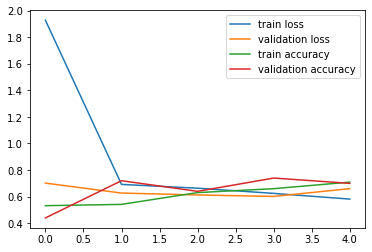

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_generator)

In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [ ]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.62
0.6217570407734342
[[10  9]
 [10 21]]


In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.62
0.6217570407734342
[[10  9]
 [10 21]]


In [ ]:
model.save('VGG16.h5')

In [ ]:
model_name = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

for i, layer in enumerate(model_name.layers):
    if i<165:
        layer.trainable = False
    
    print(i, layer, layer.trainable)
    
x = Flatten()(model_name.output)
prediction = Dense(noclasses, activation='softmax')(x)
model = Model(inputs=model_name.input, outputs=prediction)

94781440/94765736 [==============================] - 1s 0us/step
0 <keras.engine.input_layer.InputLayer object at 0x7f6fd0cb4650> False
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6fd0cb4b90> False
2 <keras.layers.convolutional.Conv2D object at 0x7f6fd0cb2610> False
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f6fd0cd5750> False
4 <keras.layers.core.activation.Activation object at 0x7f6fd0e08750> False
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6fd0ce1d10> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6fd0d39410> False
7 <keras.layers.convolutional.Conv2D object at 0x7f6fd0cfbf50> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f6fd0c614d0> False
9 <keras.layers.core.activation.Activation object at 0x7f6fd0ce9190> False
10 <keras.layers.convolutional.Conv2D object at 0x7f6fd0ca9d10> False
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (224,224),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (224,224),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model_history = model.fit(train_generator, 
                          validation_data=test_generator,
                          epochs=30,
                          steps_per_epoch=len(train_generator),
                          validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 52s 12s/step - loss: 6.0779 - accuracy: 0.4729 - val_loss: 2.0503 - val_accuracy: 0.5800
Epoch 2/30
4/4 [==============================] - 46s 11s/step - loss: 2.0884 - accuracy: 0.7094 - val_loss: 8.1807 - val_accuracy: 0.3800
Epoch 3/30
4/4 [==============================] - 48s 15s/step - loss: 0.6860 - accuracy: 0.7241 - val_loss: 1.0737 - val_accuracy: 0.7200
Epoch 4/30
4/4 [==============================] - 45s 14s/step - loss: 0.6850 - accuracy: 0.6798 - val_loss: 1.1630 - val_accuracy: 0.6400
Epoch 5/30
4/4 [==============================] - 45s 11s/step - loss: 0.7600 - accuracy: 0.6798 - val_loss: 3.6212 - val_accuracy: 0.4600
Epoch 6/30
4/4 [==============================] - 44s 11s/step - loss: 0.7937 - accuracy: 0.6601 - val_loss: 1.4322 - val_accuracy: 0.6400
Epoch 7/30
4/4 [==============================] - 45s 11s/step - loss: 0.8568 - accuracy: 0.6995 - val_loss: 6.6932 - val_accuracy: 0.4000
Epoch 8/30
4/4 [===========

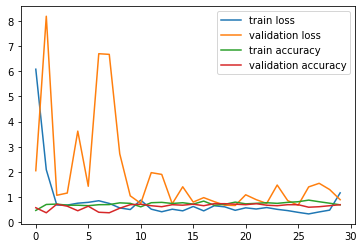

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

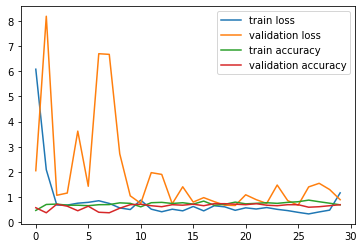

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1)
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.66
0.6615720891130726
[[11  8]
 [ 9 22]]


In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.66
0.6615720891130726
[[11  8]
 [ 9 22]]


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
## **Feature Extraction with VGG-16 and classification with SVM**

Features are extracted from the images using VGG16 model and then these features are fed to SVM classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir
import imutils
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split

Data Augmentation

In [ ]:
#method for cropping image i.e. for getting brain area
def crop_brain_contour(image, plot=False):
    
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Preprocessed Image')
        
        plt.show()
    
    return new_image

In [ ]:
# function for loading images and labels into X and y..in X, it will store images.. 
#and in y it will store actual image label (0 or 1) for each image..if 0 no tumor,1 then tumorous image
def load_data(dir_list, image_size):
    
    # load all images in a directory
    X = []
    y = []
    
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(directory + '/' + filename)
            
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [ ]:
#path for yes and no folder
yes = "/content/drive/MyDrive/brain MRI/yes"
no = "/content/drive/MyDrive/brain MRI/no"

In [ ]:
#image size specified
IMG_WIDTH, IMG_HEIGHT = (256, 256)
#calling load function for loading X,y data by passing both folder paths
X, y = load_data([yes,no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 253
X shape is: (253, 256, 256, 3)
y shape is: (253, 1)


In [ ]:
def split_data(X, y, test_size=0.2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train, y_train, X_test, y_test

In [ ]:
#data splitting
X_train, y_train,X_test, y_test = split_data(X, y, test_size=0.3)

loading vgg16 pretrained model

In [ ]:

from keras.applications.vgg16 import VGG16
SIZE=256
VGG_model=VGG16(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#we are not not using VGG16 model for training...so we made all layers as non trainable
for layer in VGG_model.layers:
    layer.trainable=False

In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#saving vgg model into file for further use
VGG_model.save("/content/drive/My Drive/VGG_model.h5")

extract features for training data

In [ ]:

feature_ex=VGG_model.predict(X_train)

In [ ]:
feature_ex.shape

(177, 8, 8, 512)

In [ ]:
features=feature_ex.reshape(feature_ex.shape[0],-1)

In [ ]:
features.shape

(177, 32768)

##extract features for testing data

In [ ]:
#extract features for testing data
test_feature_ex=VGG_model.predict(X_test)
test_features=test_feature_ex.reshape(test_feature_ex.shape[0],-1)

In [ ]:
test_features.shape

(76, 32768)

In [ ]:
test_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.7690244 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.0415151 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9385006 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.0352947 ,
        0.        ],
       [0.41806054, 0.        , 0.        , ..., 0.        , 1.315119  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9994047 ,
        0.        ]], dtype=float32)

Pass features to classifier model

In [ ]:

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using thetraining features extracted by VGG16 i.e.features...and the labels i.e y_train
clf.fit(features, y_train)

#Predict the response for test features
y_pred = clf.predict(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


testing accuracy

In [ ]:

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8421052631578947

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# accuracy: (tp + tn) / (p + n)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_svm)
# precision tp / (tp + fp)
precision_svm = precision_score(y_test, y_pred)
print('Precision: %f' % precision_svm)
# recall: tp / (tp + fn)
recall_svm = recall_score(y_test, y_pred)
print('Recall: %f' % recall_svm)
# f1: 2 tp / (2 tp + fp + fn)
f1_svm = f1_score(y_test, y_pred)
print('F1 score: %f' % f1_svm)

Accuracy: 0.842105
Precision: 0.780000
Recall: 0.975000
F1 score: 0.866667


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.savefig('/content/drive/My Drive/accuracy_plot.pdf',dpi=300,bbox_inches='tight')

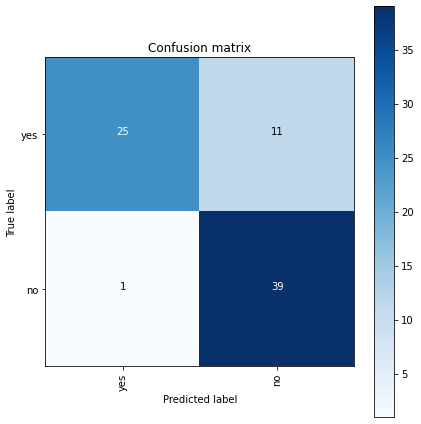

<Figure size 432x288 with 0 Axes>

In [ ]:
labels = ['yes','no']
confusion_mtx = confusion_matrix(y_test, y_pred) 
cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[25 11]
 [ 1 39]]


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

Testing the model with Sample Image with no tumour

In [ ]:
#read image and preprocess it
path="/content/drive/MyDrive/brain MRI/no/No13.jpg"
img=cv2.imread(path)
img = crop_brain_contour(img, plot=False)
img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
img = img / 255.
from keras.preprocessing import image
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
img1.shape

(224, 224, 3)

In [ ]:
img1 = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)

In [ ]:
test_image1 = image.img_to_array(img1)
test_image1 = np.expand_dims(test_image1, axis = 0)

In [ ]:
test_image1.shape

(1, 224, 224, 3)

In [ ]:
vggmodel = load_model("/content/drive/MyDrive/VGG_model.h5")

In [ ]:
#get features for input image
test_f=vggmodel.predict(test_image)

In [ ]:
test_image.shape

(1, 256, 256, 3)

In [ ]:
test_f.shape

(1, 32768)

In [ ]:
#reshape features
test_f=test_f.reshape(test_f.shape[0],-1)

In [ ]:
test_f.shape

(1, 32768)

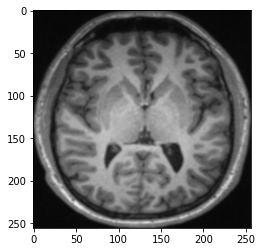

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
#load svm model which is generated already
filename = '/content/drive/My Drive/finalized_model.sav' 
svm_model = pickle.load(open(filename, 'rb'))

In [ ]:
prediction_svm=svm_model.predict(test_f)
if(prediction_svm[0]==0):
   print("No tumor detected")
else:
   print("Tumor detected")

No tumor detected


Testing the model with Sample Image with Tumourous Brain

In [ ]:
#read image and preprocess it
path="/content/drive/MyDrive/brain MRI/yes/Y109.JPG"
img_yes=cv2.imread(path)
img_yes = crop_brain_contour(img_yes, plot=False)
img_yes = cv2.resize(img_yes, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
img_yes = img_yes / 255.
from keras.preprocessing import image
test_image_yes = image.img_to_array(img_yes)
test_image_yes = np.expand_dims(test_image_yes, axis = 0)

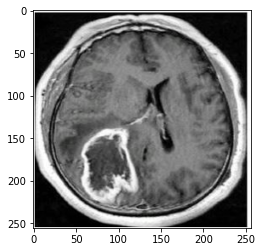

In [ ]:
plt.imshow(img_yes)

In [ ]:
img_yes.shape

(256, 256, 3)

In [ ]:
vggmodel = VGG_model

In [ ]:
test_f_yes=vggmodel.predict(test_image_yes)

In [ ]:
#reshape features
test_f_yes=test_f_yes.reshape(test_f.shape[0],-1)

In [ ]:
#load svm model which is generated already
filename = '/content/drive/My Drive/finalized_model.sav' 
svm_model = pickle.load(open(filename, 'rb'))

In [ ]:
prediction_svm=svm_model.predict(test_f_yes)
if(prediction_svm[0]==0):
   print("No tumor detected")
else:
   print("Tumor detected")

Tumor detected


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
## **VGG-16 with CNN**

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2


import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
!apt-get install tree

# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

In [ ]:
IMG_PATH = '/content/drive/MyDrive/brain MRI'
# split the data by train/val/test
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH +'/'+ CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH +'/'+ CLASS)):
            img = IMG_PATH +'/'+ CLASS + '/' + FILE_NAME
            if n < 5:
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*IMG_NUM:
                shutil.copy(img, 'TRAIN/'+ CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

In [ ]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + '/'+path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + '/'+path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)

    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'
VAL_DIR = 'VAL/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



193 images loaded from TRAIN/ directory.


100%|██████████| 2/2 [00:00<00:00, 64.00it/s]


10 images loaded from TEST/ directory.


100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

50 images loaded from VAL/ directory.


In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='blue'),
    opacity=1.0
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='red'),
    opacity=0.2

)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)    

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

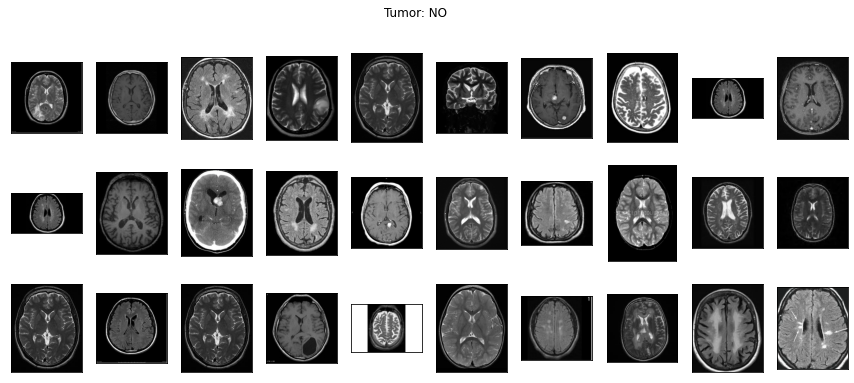

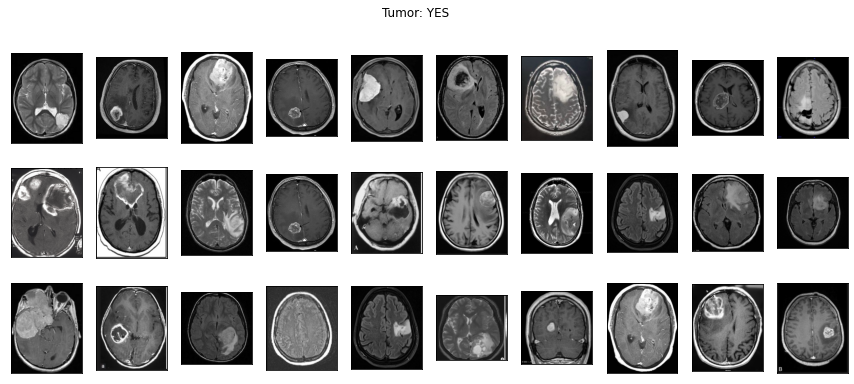

In [ ]:
plot_samples(X_train, y_train, labels, 30)

As you can see, images have different width and height and diffent size of "black corners". Since the image size for VGG-16 imput layer is (224,224) some wide images may look weird after resizing. Histogram of ratio distributions (ratio = width/height):

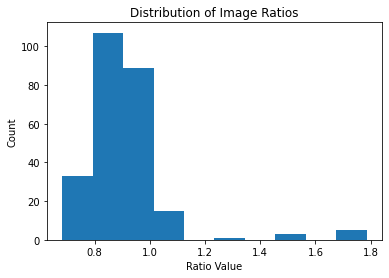

In [ ]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

The first step of "normalization" would be to crop the brain out of the images. I used technique which was perfectly described in pyimagesearch blog and I highly suggest to looks deeper into it.

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

Let's look at example what this function will do with MRI scans:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/brain MRI/yes/Y108.jpg')
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])

extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

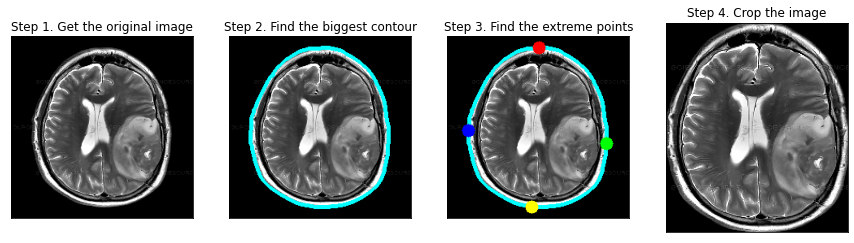

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



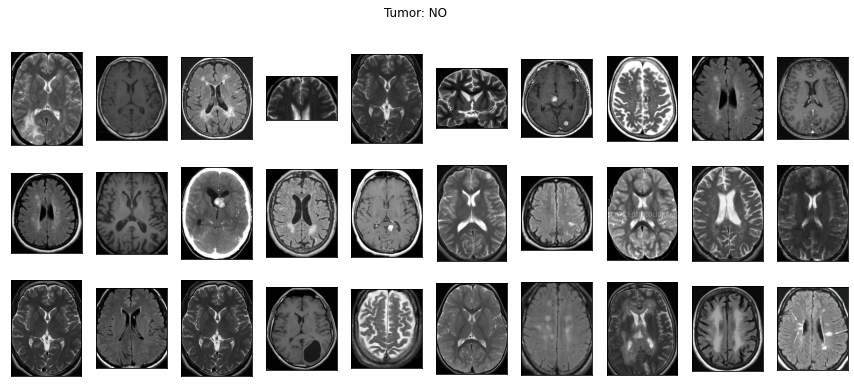

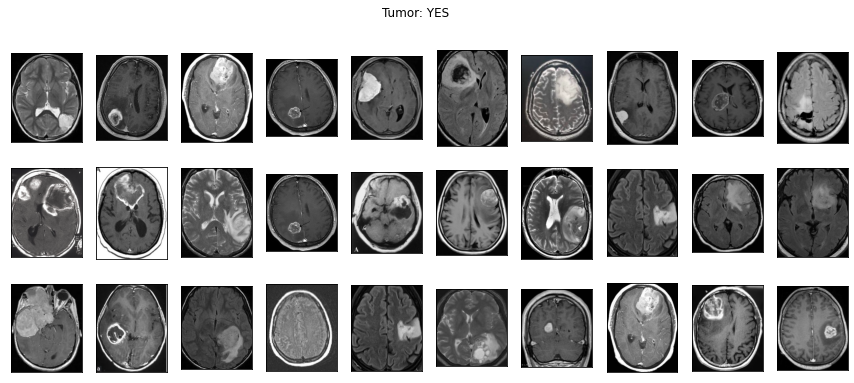

In [ ]:
plot_samples(X_train_crop, y_train, labels, 30)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

The next step would be resizing images to (224,224) and applying preprocessing needed for VGG-16 model input.

In [ ]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

CNN Model
I was using Transfer Learning with VGG-16 architecture and weights as a base model.

In [ ]:
#Data Augmentation
#Since I had small data set I used the technique called Data Augmentation which helps to "increase" the size of training set.

In [ ]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
#for trial from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=27,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=False)

validation_datagen = ImageDataGenerator()

In [ ]:
os.mkdir('preview1')
x = X_train_crop[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview1', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 

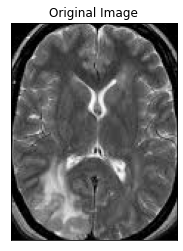

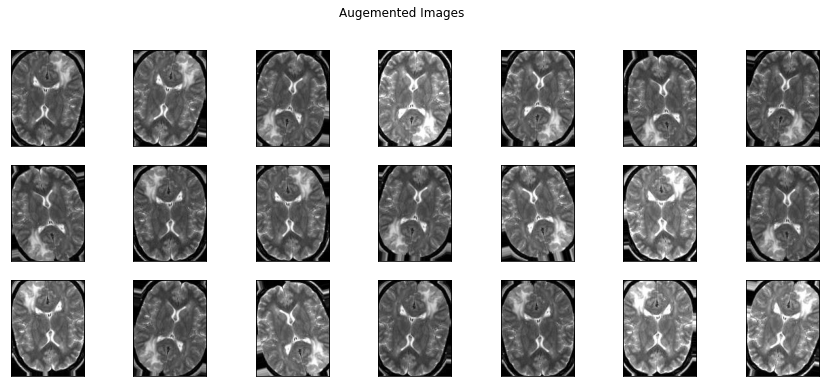

In [ ]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview1/'):
    img = cv2.cv2.imread('preview1/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)


Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
# load base model
#vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=IMG_SIZE + (3,)
)

In [ ]:
NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
EPOCHS = 50
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=6
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=[es]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
50/50 [==============================] - 110s 2s/step - loss: 3.3667 - accuracy: 0.6373 - val_loss: 1.6474 - val_accuracy: 0.8000


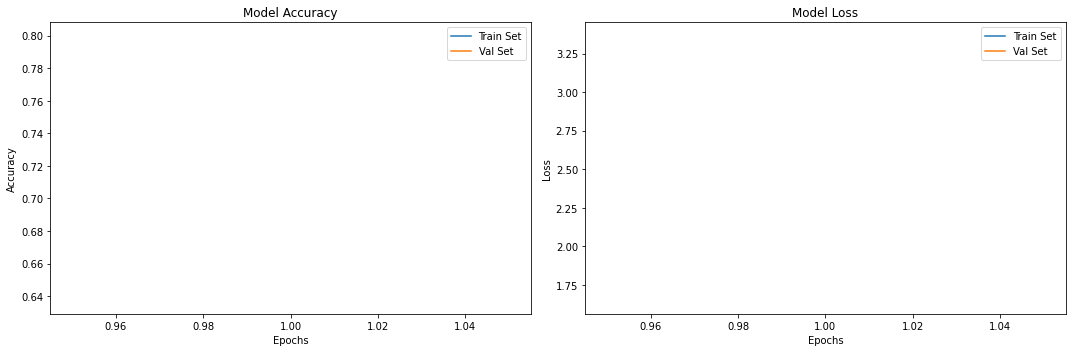

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

Val Accuracy = 0.72


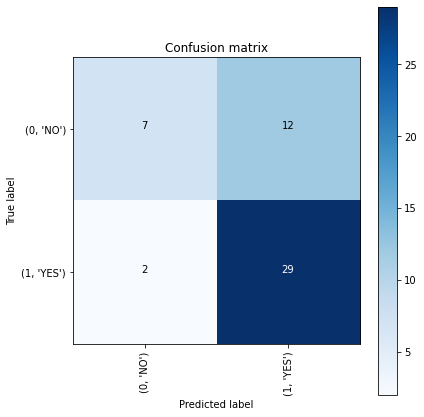

In [ ]:
# validate on val set
predictions = model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

Test Accuracy = 0.60


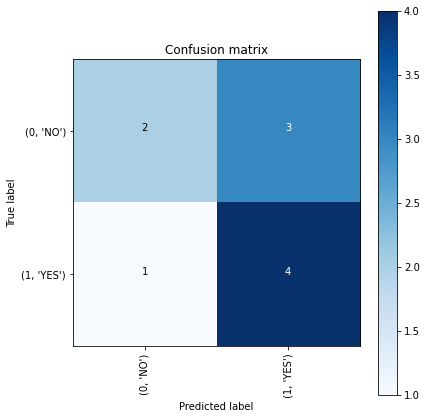

In [ ]:
# validate on test set
predictions = model.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

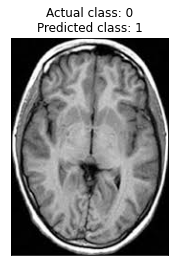

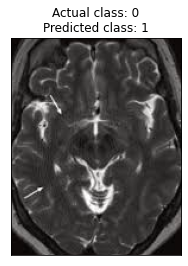

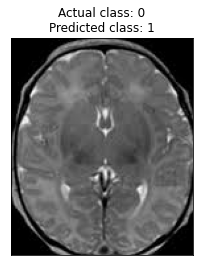

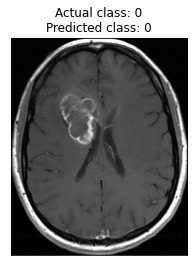

In [ ]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {y_val[i]}\nPredicted class: {predictions[i]}')
        plt.show()

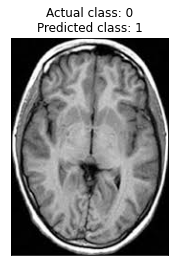

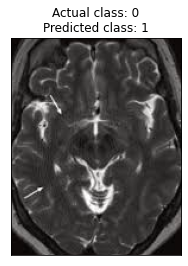

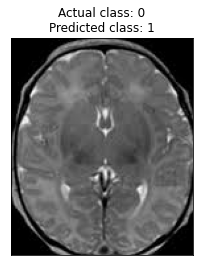

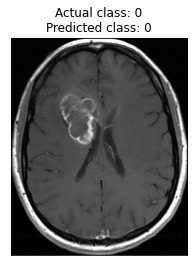

In [ ]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('There are no missclassified images.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Actual class: {y_val[i]}\nPredicted class: {predictions[i]}')
        plt.show()

# **Conclusion**
This project was a combination of CNN model classification problem (to predict wheter the subject has brain tumor or not) & Computer Vision problem (to automate the process of brain cropping from MRI scans). The final accuracy is much higher than 50% baseline (random guess). However, it could be increased by larger number of train images or through model hyperparameters tuning.

But VGG with svm outperformed all other models with an accuracy of 84%.